# Dropout for mnist dataset:
 .To avoid overfitting

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [4]:
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

In [5]:
X_train, y_train = load_mnist('fashionmnist', kind='train')
X_test, y_test = load_mnist('fashionmnist', kind='t10k')

In [6]:
X_test.shape

(10000, 784)

In [7]:
X_train = X_train.reshape(X_train.shape[0], 28, 28)
X_test = X_test.reshape(X_test.shape[0], 28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [10]:
X_train.shape

(60000, 28, 28, 1)

In [11]:
X_train[1000]


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 97],
        [ 84],
        [ 97],
        [110],
        [108],
        [ 87],
        [ 97],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 19],
        [255],
        [199],
        [183],
        [142],
        [161],
        [200],
        [213],
        [ 32],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [16]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    Dropout(0.3),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    Dropout(0.4),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_2 (ZeroPaddi  (None, 30, 30, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 dropout_3 (Dropout)         (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 zero_padding2d_3 (ZeroPaddi  (None, 16, 16, 32)       0         
 ng2D)                                                           
                                                      

In [17]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [19]:
history = model.fit(X_train, y_train_ohe, epochs=10, validation_data=(X_test, y_test_ohe), batch_size=300)

2023-06-11 19:46:03.110597: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10


2023-06-11 19:46:05.759954: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30105600 exceeds 10% of free system memory.
2023-06-11 19:46:05.925089: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30105600 exceeds 10% of free system memory.
2023-06-11 19:46:06.303635: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 30105600 exceeds 10% of free system memory.


  1/200 [..............................] - ETA: 8:07 - loss: 2.3336 - accuracy: 0.0767

2023-06-11 19:46:06.612473: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 20321280 exceeds 10% of free system memory.


200/200 [==============================] - 38s 179ms/step - loss: 0.6728 - accuracy: 0.7571 - val_loss: 0.5420 - val_accuracy: 0.8397
Epoch 2/10
200/200 [==============================] - 35s 175ms/step - loss: 0.4337 - accuracy: 0.8456 - val_loss: 0.4281 - val_accuracy: 0.8657
Epoch 3/10
200/200 [==============================] - 34s 172ms/step - loss: 0.3778 - accuracy: 0.8650 - val_loss: 0.3746 - val_accuracy: 0.8796
Epoch 4/10
200/200 [==============================] - 36s 178ms/step - loss: 0.3481 - accuracy: 0.8744 - val_loss: 0.3480 - val_accuracy: 0.8885
Epoch 5/10
200/200 [==============================] - 35s 172ms/step - loss: 0.3231 - accuracy: 0.8843 - val_loss: 0.3473 - val_accuracy: 0.8903
Epoch 6/10
200/200 [==============================] - 37s 183ms/step - loss: 0.3097 - accuracy: 0.8886 - val_loss: 0.3466 - val_accuracy: 0.8940
Epoch 7/10
200/200 [==============================] - 31s 157ms/step - loss: 0.2945 - accuracy: 0.8931 - val_loss: 0.3091 - val_accuracy: 0.9

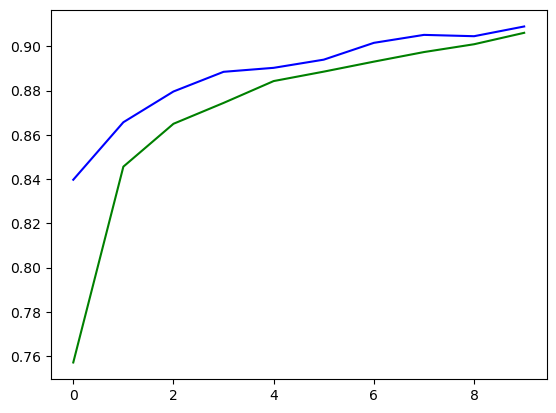

In [20]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Data')

In [21]:
model.save('Behnam.h5')